# Assignment 1

Consider two Gaussian distributions whose parameters are given as follows:
\begin{equation}
\begin{split}
\mu_1 = \begin{bmatrix} 3 \\ 1 \end{bmatrix}, & \quad \Sigma_1 = \begin{bmatrix} 1 & 2 \\ 2 & 5 \end{bmatrix}, \\
\mu_2 = \begin{bmatrix} 1 \\ 3 \end{bmatrix}, & \quad \Sigma_2 = \begin{bmatrix} 1 & 2 \\ 2 & 5 \end{bmatrix}.
\end{split}
\end{equation}


## (1) Plot

Show the scatter plot of bi-variate random numbers (2-d samples) $X$ generated from the above two distributions (use different colors or markers so that the two distributions can be distinguished).

* Use `ax.set_aspect('equal', adjustable='box')` to equalize the x- and y-scales. See https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_aspect.html for details.
* You can use [`numpy.random.multivariate_normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html?highlight=multivariate#numpy.random.multivariate_normal) to generate random samples.

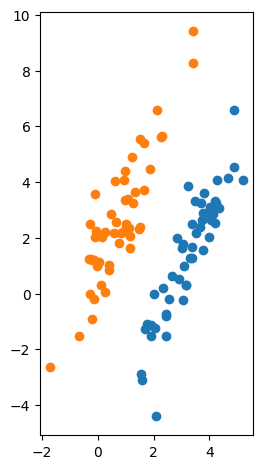

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import multivariate_normal

N=100
X = np.vstack( [
                multivariate_normal([3, 1], [[1, 2], [2, 5]], size=N//2),
                multivariate_normal([1, 3], [[1, 2], [2, 5]], size=N//2)
               ])
Y = np.hstack( [np.zeros(N//2), np.ones(N//2)])

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(X[:N//2, 0], X[:N//2, 1])
ax.scatter(X[N//2:, 0], X[N//2:, 1])
ax.set_aspect('equal', adjustable='box')
fig.tight_layout()
plt.show()


## (2) PCA

Apply PCA to the 2-d samples generated in (1) by assuming two distributions as a single sample set. Draw the 1st principal axis on the scatter plot in (1). (Do not use built-in / library function of PCA, such as `sklearn.decomposition.PCA`)

* Use `ax.set_aspect('equal', adjustable='box')` to equalize the x- and y-scales as done in the above.
* `print()` the calculated axis orientation (the slope).


## コードの解説
下のようアルゴリズムでPCAを実行し、第一主成分を得た。
- データの行列Xから、各成分の平均値を引いて中心化を施した新しい行列X_centeredを作成。
- X_centeredの分散共分散行列Sを得る。
- 得た共分散行列の固有値問題を解く。第一主成分は、共分散行列の中で最大の固有値に属する固有ベクトルを求めれば良い。(以下では、fpcv(first principal component vector)という変数名で格納した。)

In [28]:
mean = np.mean(X,axis=0)
print(mean)
X_centered = X - mean
#print(np.mean(X_centered))


S = np.dot(X_centered.T,X_centered)/100
S_eig = np.linalg.eig(S)
print(S_eig)

max_index = np.argmax(S_eig[0])
print(max_index)

fpcv = [float(S_eig[1][0][max_index]), float(S_eig[1][1][max_index])]
print(f"第一主成分ベクトルは{fpcv}")



[2.00565854 2.0140148 ]
(array([2.09844888, 5.74213763]), array([[-0.94528383, -0.32624912],
       [ 0.32624912, -0.94528383]]))
1
第一主成分ベクトルは[-0.32624911886827823, -0.9452838263916675]


### 実行
上の操作から、第一主成分の情報などが手に入った。あとはこれを使って、plotなどをしていけば良い。
ここで、主成分ベクトルは平均の点を中心として、分散が最大になるような方向であることに注意する。

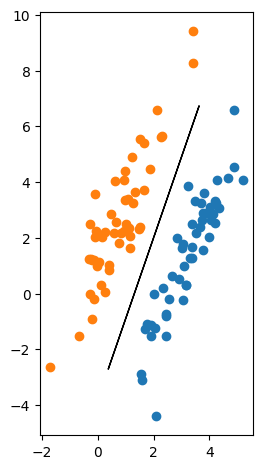

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(X[:N//2, 0], X[:N//2, 1])
ax.scatter(X[N//2:, 0], X[N//2:, 1])
ax.set_aspect('equal', adjustable='box')
fig.tight_layout()

ax.arrow(x=mean[0], y=mean[1], dx=fpcv[0]*5, dy=fpcv[1]*5)
ax.arrow(x=mean[0], y=mean[1], dx=-fpcv[0]*5, dy=-fpcv[1]*5)
plt.show()

- slopeは、先ほど求めた共分散行列が中心化されたデータに対して求めたことを思い出すと、単純に割り算で求まる。

In [30]:
slope = fpcv[1]/fpcv[0]
slope_deg = np.degrees(np.arctan(slope))
print(f"slope : {slope}({slope_deg}[deg])")

slope : 2.897429515429043(70.95873034112088[deg])


To double-check the optimality of the axis given by PCA, plot the variance $\tilde{\sigma}^2$ at each axis orientation $\theta = [0:\pi]$.  Also `print()` the value of $\theta$ where $\tilde{\sigma}^2$ is maximized.

- まず、$\theta \in [0,\pi]$を100個の点に等分割した配列thetasを作成。
- thetasの各要素における分散の値を記録し、配列sigmaに格納していく
この操作について詳しく解説する。中心化処理を行ったデータX_centeredに対して、$-\dfrac{\pi}{100}$[deg]ずつ回転を加える。\\
この回転されたX_centeredに対して、x軸上での分散を計算し、sigmaに格納\\
軸を回転させる動作を、データの回転に置き換える。
- thetasとsigmaでプロット

In [31]:
#回転行列を定義
def rot(theta):
    return np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

In [32]:
thetas = thetas = np.linspace(-90, 90, 1000)
sigma = []
for theta in thetas:
    theta = (theta * np.pi)/180
    temp = np.dot(X_centered, rot(theta))
    var = np.var(temp[:,0])
    sigma.append(var)

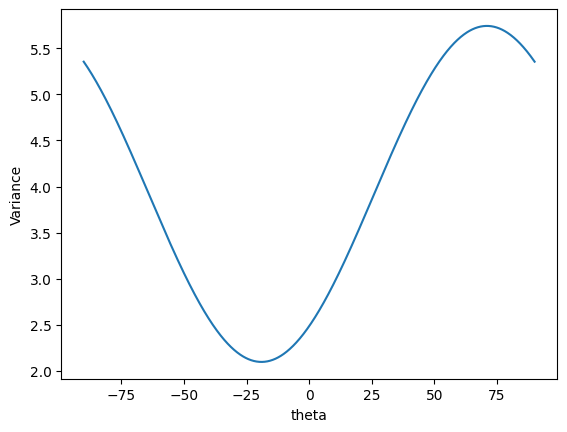

max variance = 5.742133914700315 at 70.9009009009009[deg]


In [33]:
plt.plot(thetas, sigma)
plt.xlabel('theta')
plt.ylabel('Variance')
plt.show()

# Print theta where variance is maximized
max_var_index = np.argmax(sigma)

print(f"max variance = {sigma[max_var_index]} at {thetas[max_var_index]}[deg]")


## (3) LDA

Apply Fisher LDA to the 2-d samples generated in (1) by assuming the two distributions are two different classes. Draw the calculated axis on the scatter plot. (Do not use built-in function of LDA, such as `sklearn.discriminant_analysis.LinearDiscriminantAnalysis`)

* Use `ax.set_aspect('equal', adjustable='box')` to equalize the x- and y-scales as done in the above.


## アルゴリズム
- それぞれのクラスごとにデータを分けます。（Xを前半50からなるX1と後半50からなるX2で分割）
- それぞれのクラスごとでの平均ベクトルm1, m2を計算する。
- m1, m2を用いてクラス内分散の和Swを計算する。次に、クラス間分散Sbを計算する。

In [8]:
X_sep = np.split(X,2)
X1, X2 = X_sep[0], X_sep[1]
m1 = np.mean(X1, axis=0)
m2 = np.mean(X2, axis=0)
print(m1, m2)

Sw = np.dot((X1-m1).T, X1-m1) + np.dot((X2-m2).T, X2-m2)
print(Sw)
Sb = ((50*50)/(50+50))*np.dot((m1-m2), (m1-m2).T)
print(Sb)

[2.91296754 0.92998342] [0.96928885 2.71057055]
[[ 91.17302979 178.76608498]
 [178.76608498 421.63128863]]
173.7094347718314


## アルゴリズムの続き


In [34]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))

print(eigen_values, eigen_vectors)


max_index = np.argmax(eigen_values)
print(max_index)

ans = [float(S_eig[1][0][max_index]), float(S_eig[1][1][max_index])]
print(f"固有値が最大の固有ベクトルは{ans}")

[13.39054672  0.3475358 ] [[ 0.91617554  0.40077722]
 [-0.40077722  0.91617554]]
0
固有値が最大の固有ベクトルは[-0.9452838263916675, 0.32624911886827823]


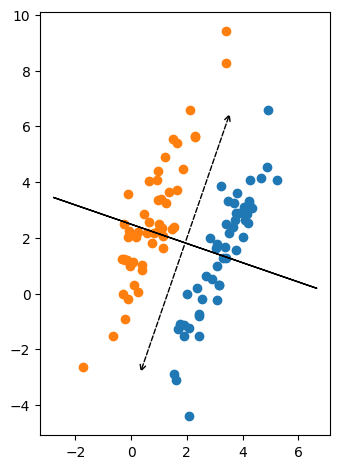

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(X[:N//2, 0], X[:N//2, 1])
ax.scatter(X[N//2:, 0], X[N//2:, 1])
ax.set_aspect('equal', adjustable='box')
fig.tight_layout()

mean_all_x = (m1[0]+m2[0])/2
mean_all_y = (m1[1]+m2[1])/2

ax.arrow(x=mean_all_x, y=mean_all_y, dx=ans[0]*5, dy=ans[1]*5)
ax.arrow(x=mean_all_x, y=mean_all_y, dx=-ans[0]*5, dy=-ans[1]*5)


ax.annotate('', 
            xy=(mean_all_x-ans[1]*5, mean_all_y+ans[0]*5),  # 矢印の先端
            xytext=(mean_all_x, mean_all_y),  # 矢印の基点
            arrowprops=dict(arrowstyle='->', linestyle='dashed'))

ax.annotate('', 
            xy=(mean_all_x+ans[1]*5, mean_all_y-ans[0]*5),  # 矢印の先端
            xytext=(mean_all_x, mean_all_y),  # 矢印の基点
            arrowprops=dict(arrowstyle='->', linestyle='dashed'))            


plt.show()

In [36]:
slope = ans[1]/ans[0]
slope_deg = np.degrees(np.arctan(slope))
print(f"slope : {slope}({slope_deg}[deg])")

slope : -0.3451335035675313(-19.041269658879127[deg])


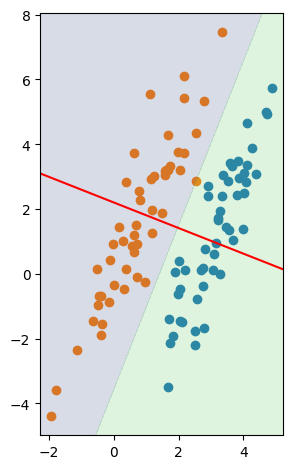

slope = -0.3948396849588854 (-21.5 [deg])


In [ ]:
# Implement by yourself

To double-check the optimality of the axis given by LDA, plot $\tilde{S}_b / \tilde{S}_w$ at each axis orientation $\theta = [0:\pi]$.  Also `print()` the value of $\theta$ where $\tilde{S}_b / \tilde{S}_w$ is maximized.

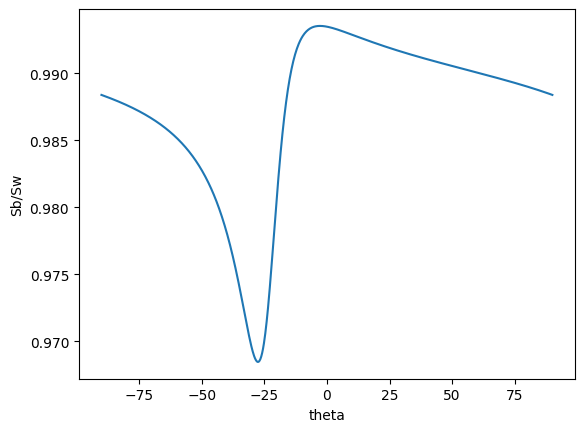

max variance = 5.742133914700315 at 70.9009009009009[deg]


In [51]:
thetas = thetas = np.linspace(-90, 90, 1000)

def rot(theta):
    w = np.array([np.cos(theta), np.sin(theta)])
    return w

ans = []

for theta in thetas:
    deg = (theta * np.pi)/180
    class1 = X1@rot(deg)
    class2 = X2@rot(deg)

    Sw = np.var(class1) + np.var(class2) 

    m1 = np.mean(X1)
    m2 = np.mean(X2)

    Sb = np.var((X1-X2)@rot(deg))
    #print(m1,m2,Sw,Sb)

    ans.append(Sb/Sw)




plt.plot(thetas, ans)
plt.xlabel('theta')
plt.ylabel('Sb/Sw')
plt.show()

# Print theta where variance is maximized
max_var_index = np.argmax(sigma)

print(f"max variance = {sigma[max_var_index]} at {thetas[max_var_index]}[deg]")


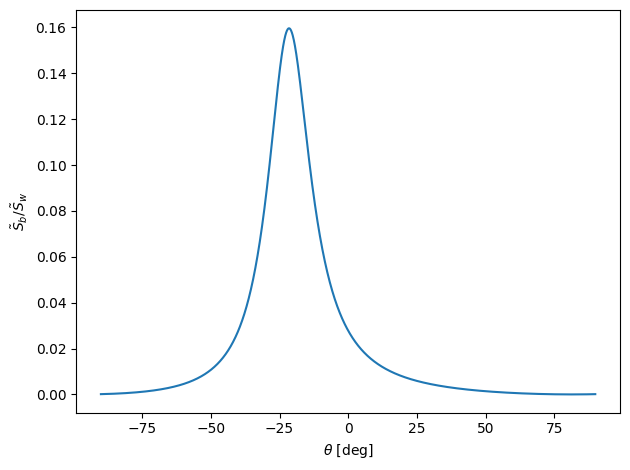

max Sb / Sw = 0.15959606518459715 at -21.5 [deg]


In [ ]:
# Implement by yourself

## (4) Histograms

Show the 1-d histograms of the sample data transformed by the calculated axes in (2) and (3).
* You can use [`numpy.histogram()`](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html) and/or [`matplotlib.pyplot.hist()`](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib-pyplot-hist).

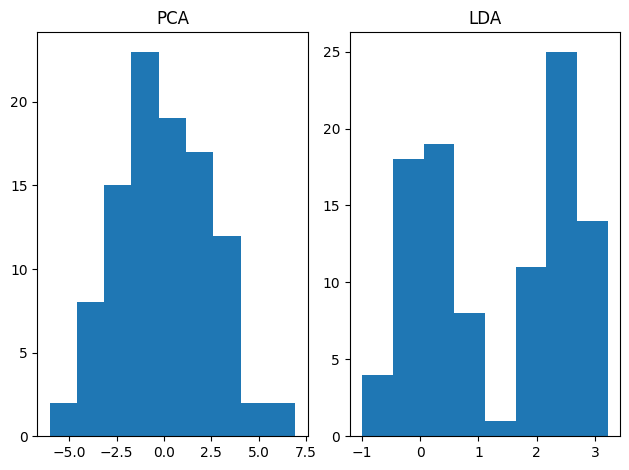

In [ ]:
# Implement by yourself

# (5) Discussions

Explain the results in this cell.

**Example**
1. The axis in PCA represents ...
   * You can use $\LaTeX$ math notation (both inline and display styles).
   * You can include figures if needed. Simply copy a figure in clipboard and type `Ctrl-V` in the cell.




# Submit your ipynb

1. Click [Runtime]->[Restart and run all] to make sure that the notebook can run successfully from scratch.
2. Download the notebook as `ipynb` by [File]->[Download] menu.
3. Upload the downloaded `ipynb` to PandA.

